<a href="https://colab.research.google.com/github/rajanintheus/DataScience/blob/main/RedWineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
#import lib
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [90]:
pip install -q git+https://github.com/tensorflow/docs

     |████████████████████████████████| 1.0MB 12.3MB/s 


In [91]:
from imblearn.under_sampling import TomekLinks, ClusterCentroids
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter
import imblearn
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn import svm
from sklearn.metrics import accuracy_score
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from keras import Sequential
%matplotlib inline

In [3]:
# import data

In [78]:
wine = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=";")

In [79]:
wine.isna().sum() if (wine.isna().sum()).any()>0 else "Data is Clean"

'Data is Clean'

# EDA

### column names

In [5]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**Initial Visusal Analysis**

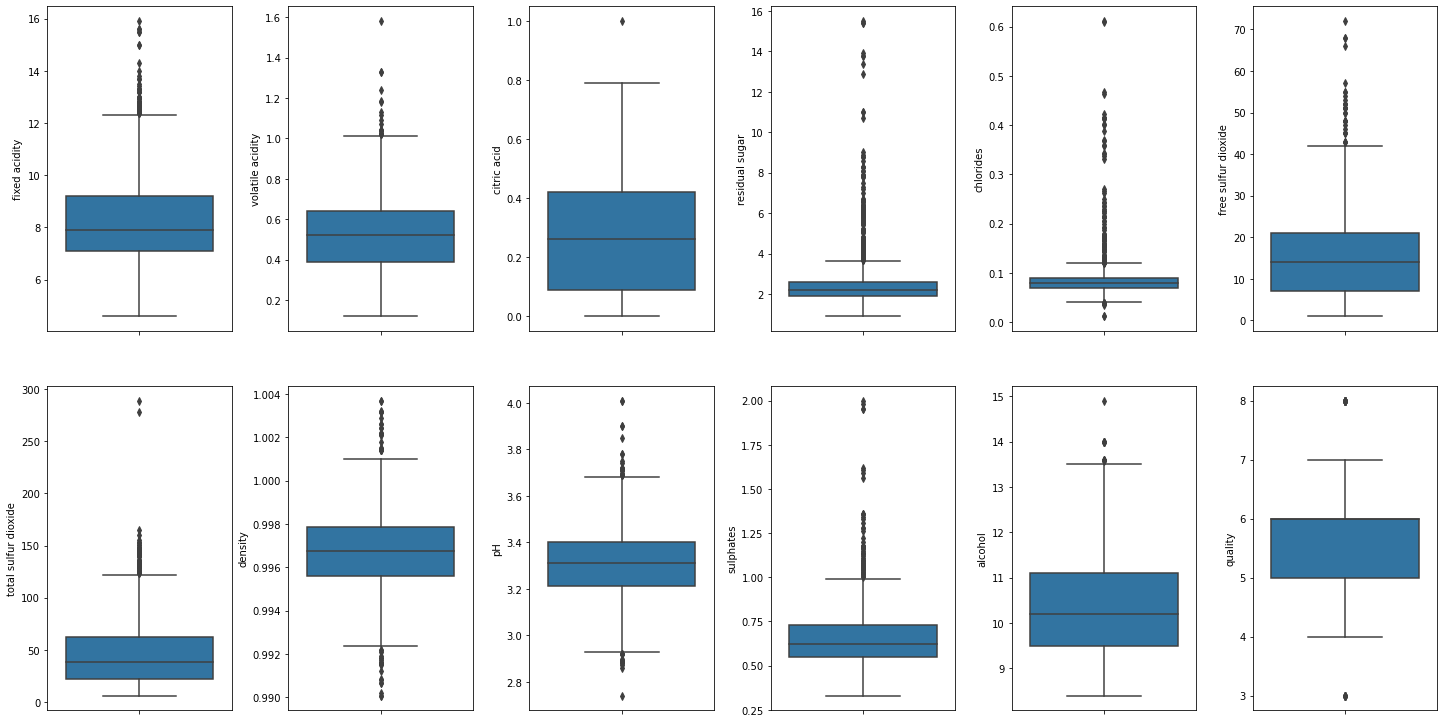

In [17]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wine.items():
    if col != 'type':
        sns.boxplot(y=col, data=wine, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

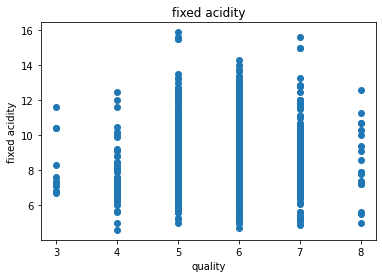

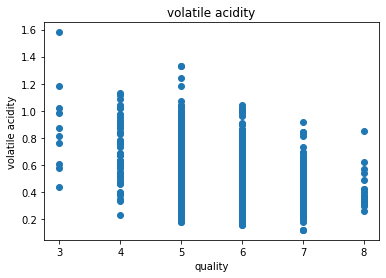

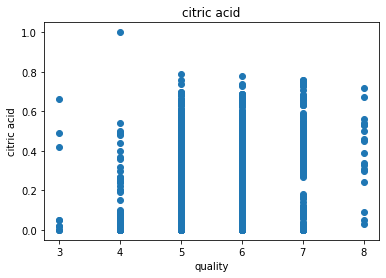

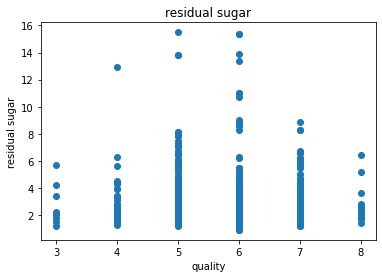

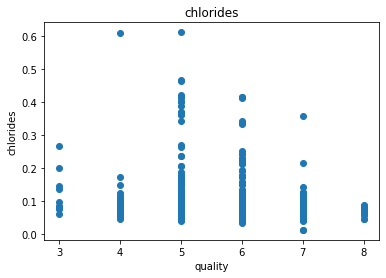

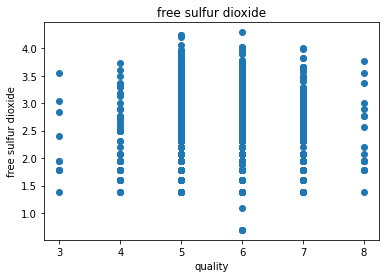

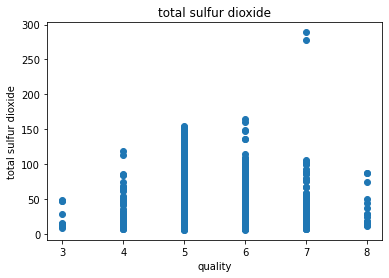

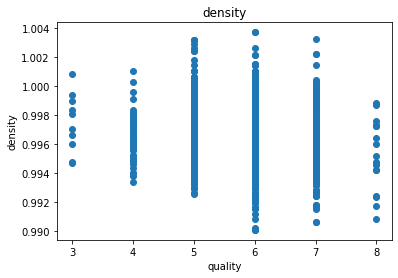

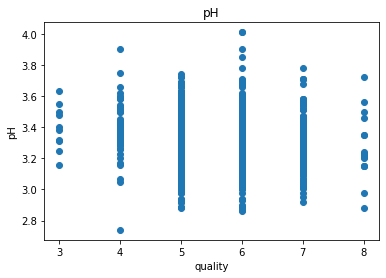

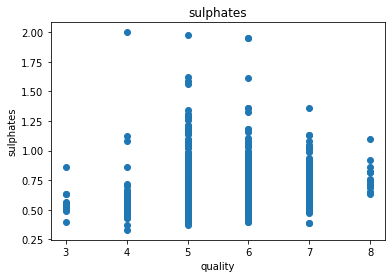

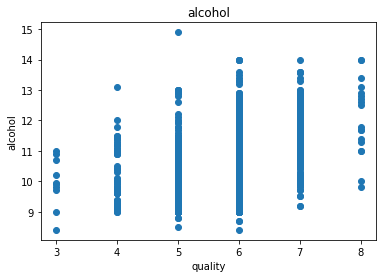

In [25]:
for label in wine.columns[:-1]:
# for label in ['alcohol']:
    plt.scatter(wine['quality'], wine[label])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    ##plt.savefig('imgs/'+'red'.join(label.split(' ')))
    plt.show()

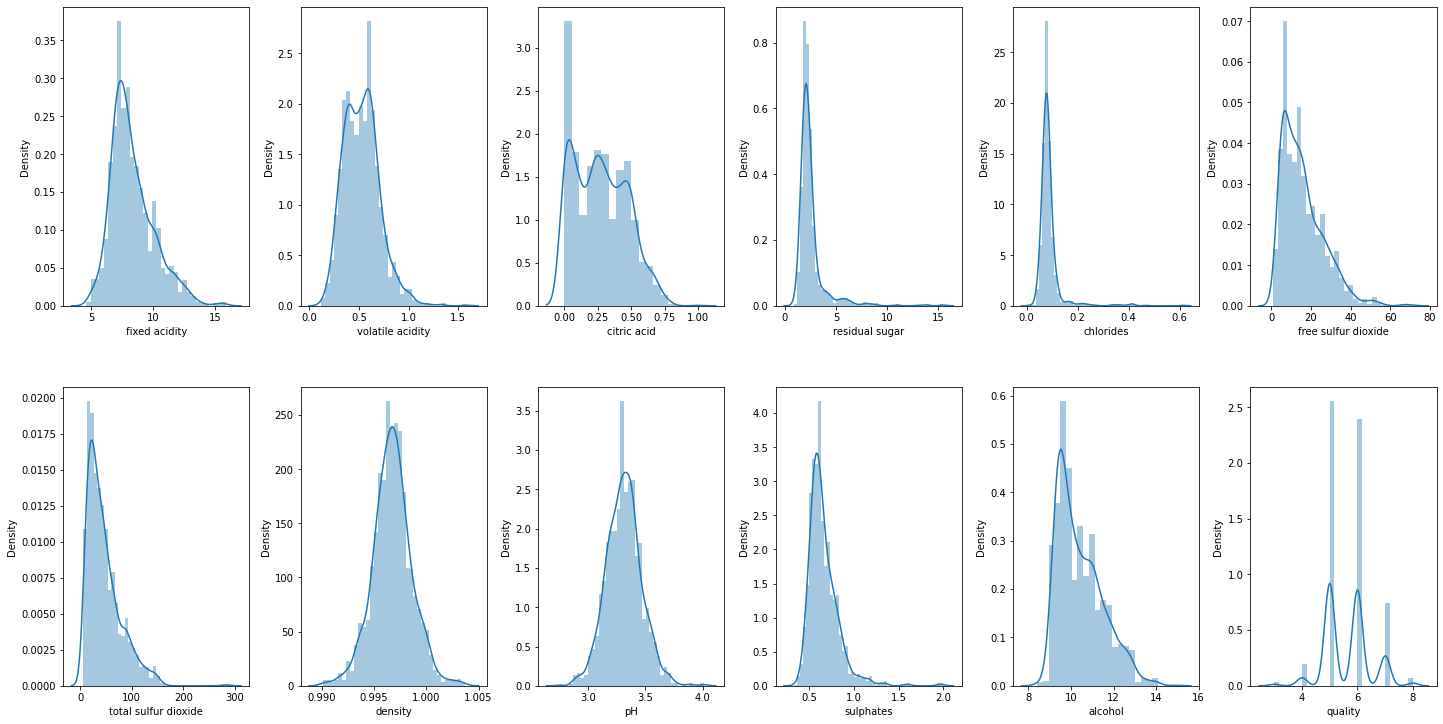

In [18]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in wine.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [19]:
# log transformation
wine['free sulfur dioxide'] = np.log(1 + wine['free sulfur dioxide'])

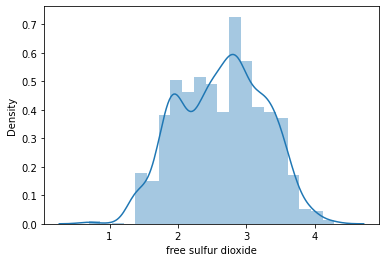

In [20]:
sns.distplot(wine['free sulfur dioxide'])

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

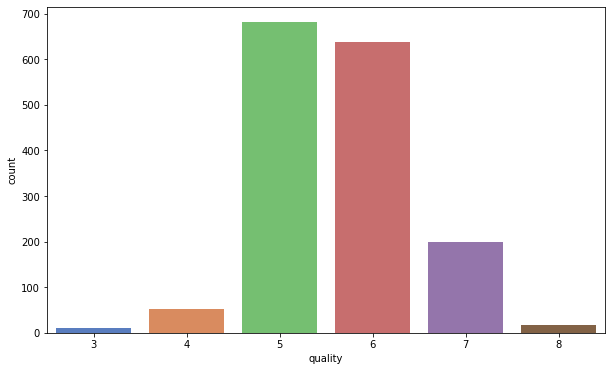

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["quality"], palette="muted")
wine["quality"].value_counts()

**Correlation Matrix**

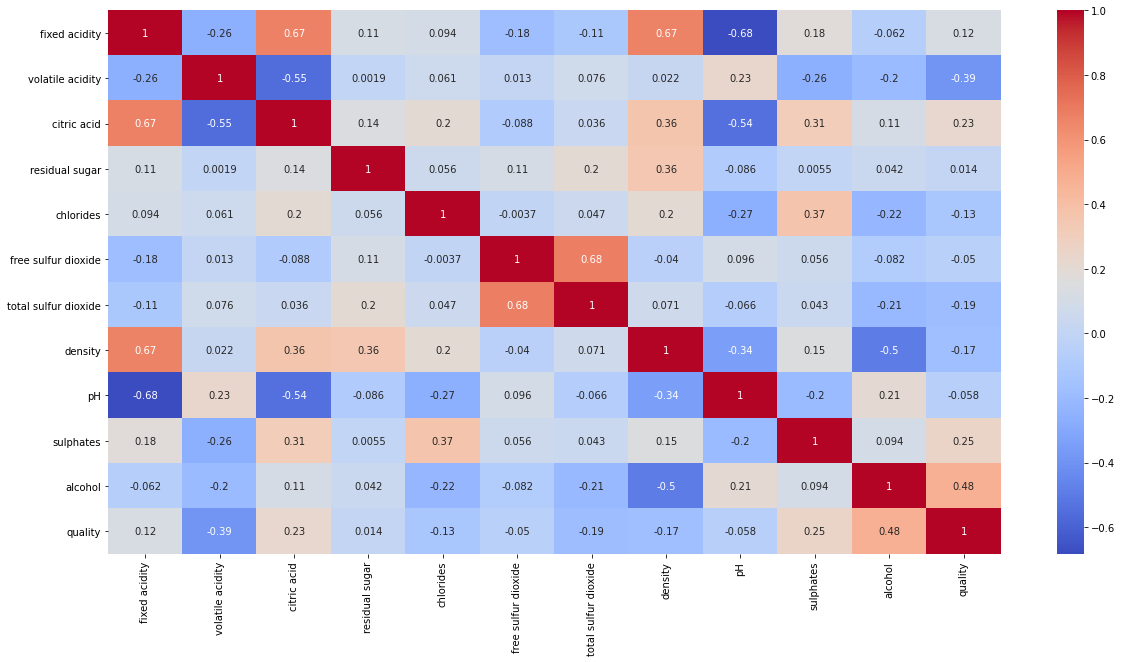

In [26]:
corr = wine.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

**Defining the Variable**

In [27]:
x=wine[['alcohol',"sulphates","citric acid"]]
y=wine[['quality']]

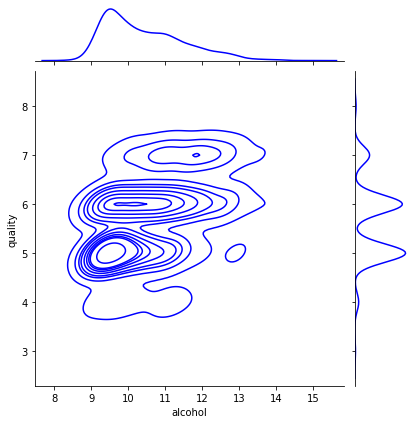

In [73]:
sns.jointplot(wine["alcohol"], wine["quality"], color='blue', kind="kde")

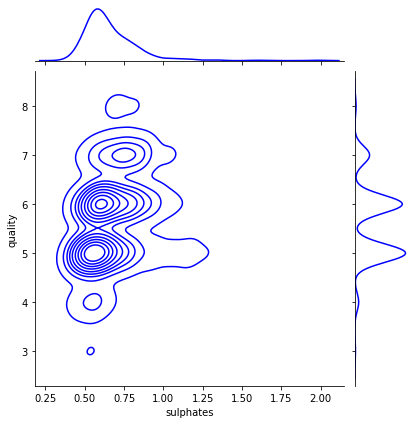

In [72]:
sns.jointplot(wine['sulphates'], wine["quality"], color='blue', kind="kde")

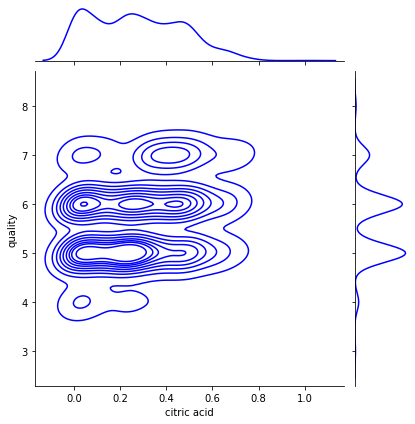

In [71]:
sns.jointplot(wine['citric acid'], wine["quality"], color='blue', kind="kde")

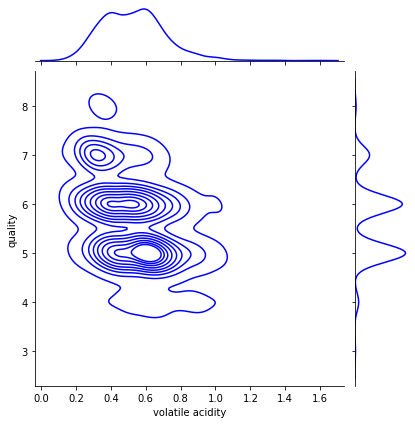

In [70]:
sns.jointplot(wine['volatile acidity'], wine["quality"], color='blue', kind="kde")

### Data Transformation 

We want to transfer the score(num) to low-medium-high quality level(categorical) by: 

3,4 -> low

5,6 -> medium

7,8,9 -> high

In [ ]:
quality = wine["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")

In [ ]:
[(i, category.count(i)) for i in set(category)]

[('Medium', 1319), ('Low', 63), ('High', 217)]

### barplot of the response after transformation

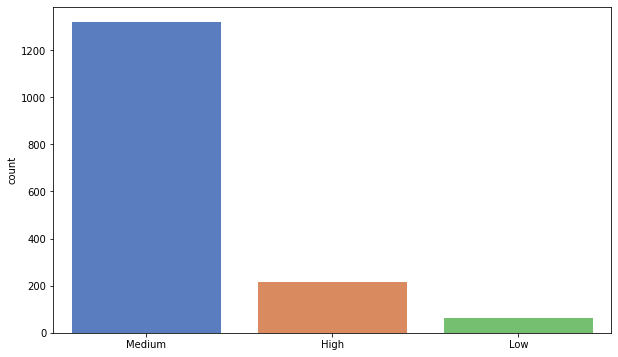

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(category, palette="muted")

# Set up model matrix

In [31]:
quality = wine["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Midium")
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([wine, category], axis=1)
data.drop(columns="quality", axis=1, inplace=True)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [32]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2020)

# Build models

**Random Forest**

In [34]:
clf = RandomForestClassifier(random_state=2018, oob_score=True)
param_dist = {"n_estimators": [50, 100, 150, 200, 250],
              'min_samples_leaf': [1, 2, 4]}
rfc_gs = GridSearchCV(clf, param_grid=param_dist, scoring='accuracy', cv=5)
rfc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=2018,
                                 

In [ ]:
rfc_gs.best_score_

0.8623927696078433

## SVM

In [35]:
# strtifiedKFold
skf = StratifiedKFold(n_splits=4)

In [36]:
pipe_svm = Pipeline([('clf', svm.SVC())])
grid_params = dict(clf__C=[0.1, 0.3, 1, 3, 10],
                   clf__gamma=[0.1, 0.3, 1, 3, 10],
                   clf__kernel=['rbf', 'sigmoid'])
gs_svm = GridSearchCV(estimator=pipe_svm,
                      param_grid=grid_params,
                      scoring='accuracy',
                      cv=skf)
gs_svm.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'clf__C': [0.1, 0.3, 1, 3, 10],
                 

In [37]:
print(gs_svm.best_score_)

0.8483199451410659


In [38]:
# just for comparision
pred_svm = gs_svm.predict(X_test)
print(classification_report(y_test, pred_svm))
print("The SVM model accuracy on Test data is %s" %
      accuracy_score(y_test, pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.26      0.42        42
           1       0.00      0.00      0.00        12
           2       0.86      1.00      0.93       266

    accuracy                           0.87       320
   macro avg       0.62      0.42      0.45       320
weighted avg       0.85      0.87      0.82       320

The SVM model accuracy on Test data is 0.865625


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
# @hidden_cell
# relabel back : 0 means good, 1 for low, 2 for medium for better visualization
y_test_re = list(y_test)
for i in range(len(y_test_re)):
    if y_test_re[i] == 0:
        y_test_re[i] = "good"
    if y_test_re[i] == 1:
        y_test_re[i] = "low"
    if y_test_re[i] == 2:
        y_test_re[i] = "medium"
pred_svm_re = list(pred_svm)
for i in range(len(pred_svm_re)):
    if pred_svm_re[i] == 0:
        pred_svm_re[i] = "good"
    if pred_svm_re[i] == 1:
        pred_svm_re[i] = "low"
    if pred_svm_re[i] == 2:
        pred_svm_re[i] = "medium"
y_actu = pd.Series(y_test_re, name='Actual')
y_pred = pd.Series(pred_svm_re, name='Predicted')
svm_confusion = pd.crosstab(y_actu, y_pred)

In [40]:
svm_confusion

Predicted,good,medium
Actual,,
good,11,31
low,0,12
medium,0,266


## Decision Tree

In [41]:
clf = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))])

criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [8, 9, 10, 11, 15, 20, 25]
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None]

param_grid =\
    [{'clf__class_weight': class_weight,
      'clf__criterion': criterion,
      'clf__splitter': splitter,
      'clf__max_depth': max_depth,
      'clf__min_samples_leaf': min_samples_leaf
      }]

gs_dt = GridSearchCV(estimator=clf, param_grid=param_grid,
                     scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
gs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    6.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                      

In [42]:
print(gs_dt.best_score_)

0.8131311274509804


## KNN

In [43]:
# knn with pca grid search
pipe_knn_pca = Pipeline([('pca', PCA()),
                         ('clf', KNeighborsClassifier())])
grid_params_knn_pca = \
    dict(pca__n_components=range(1, 11), clf__n_neighbors=range(1, 10))

gs_knn_pca = GridSearchCV(estimator=pipe_knn_pca,
                          param_grid=grid_params_knn_pca,
                          scoring='accuracy')

gs_knn_pca.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
               

In [44]:
print(gs_knn_pca.best_score_)

0.8194056372549019


**" Therefore, random Forest gives best result. "**

## check its performance on test

In [45]:
# check its performance on test
pred_rfc = rfc_gs.predict(X_test)
print(classification_report(y_test, pred_rfc))
print("The RF model accuracy on Test data is %s" %
      accuracy_score(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.72      0.50      0.59        42
           1       0.00      0.00      0.00        12
           2       0.89      0.97      0.93       266

    accuracy                           0.87       320
   macro avg       0.54      0.49      0.51       320
weighted avg       0.83      0.87      0.85       320

The RF model accuracy on Test data is 0.871875


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# @hidden_cell
# relabel back : 0 means good, 1 for low, 2 for medium for better visualization
y_test_re = list(y_test)
for i in range(len(y_test_re)):
    if y_test_re[i] == 0:
        y_test_re[i] = "good"
    if y_test_re[i] == 1:
        y_test_re[i] = "low"
    if y_test_re[i] == 2:
        y_test_re[i] = "medium"
pred_rfc_re = list(pred_rfc)
for i in range(len(pred_rfc_re)):
    if pred_rfc_re[i] == 0:
        pred_rfc_re[i] = "good"
    if pred_rfc_re[i] == 1:
        pred_rfc_re[i] = "low"
    if pred_rfc_re[i] == 2:
        pred_rfc_re[i] = "medium"
y_actu = pd.Series(y_test_re, name='Actual')
y_pred = pd.Series(pred_rfc_re, name='Predicted')
rfc_confusion = pd.crosstab(y_actu, y_pred)

In [47]:
rfc_confusion

Predicted,good,medium
Actual,,
good,21,21
low,0,12
medium,8,258


# Resampling 

In [49]:
# under sample "2" ；
# over sample "1", "0"
smt = ClusterCentroids(ratio={2: 1053})
X_sm, y_sm = smt.fit_sample(X_train, y_train)
smt2 = SMOTE(ratio={0: 1053, 1: 1053})
X_sm2, y_sm2 = smt2.fit_sample(X_sm, y_sm)

/usr/local/lib/python3.6/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:156: ConvergenceWarning: Number of distinct clusters (915) found smaller than n_clusters (1053). Possibly due to duplicate points in X.
  self.estimator_.fit(X[y == target_class])


## Random Forest

In [50]:
rfc_rs = RandomForestClassifier(random_state=2020)
param_dist = {"n_estimators": [50, 100, 150, 200, 250],
              'min_samples_leaf': [1, 2, 4]}
rfc_gs_rs = GridSearchCV(rfc_rs, param_grid=param_dist,
                         scoring='accuracy', cv=5)
rfc_gs_rs.fit(X_sm2, y_sm2)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [51]:
rfc_gs_rs.best_score_

0.9341666833838191

In [52]:
importances = rfc_gs_rs.best_estimator_.feature_importances_

In [53]:
wine.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [54]:
feature_importances = pd.DataFrame(importances,index = wine.columns[:-1],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

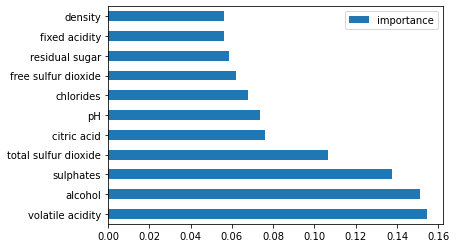

In [55]:
feature_importances.plot(kind='barh')

## SVM_rs

In [56]:
# grid search after resample
pipe_svm = Pipeline([('clf', svm.SVC())])
grid_params = dict(clf__C=[0.1, 0.3, 1, 3, 10],
                   clf__gamma=[0.1, 0.3, 1, 3, 10],
                   clf__kernel=['rbf', 'sigmoid'])
gs_svm_sm = GridSearchCV(estimator=pipe_svm,
                         param_grid=grid_params,
                         scoring='accuracy',
                         cv=skf)
gs_svm_sm.fit(X_sm2, y_sm2)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'clf__C': [0.1, 0.3, 1, 3, 10],
                 

In [57]:
gs_svm_sm.best_score_

0.9215009385378062

## DT_rs

In [58]:
clf = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))])

criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [8, 9, 10, 11, 15, 20, 25]
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None]

param_grid =\
    [{'clf__class_weight': class_weight,
      'clf__criterion': criterion,
      'clf__splitter': splitter,
      'clf__max_depth': max_depth,
      'clf__min_samples_leaf': min_samples_leaf
      }]

gs_dt_rs = GridSearchCV(estimator=clf,
                        param_grid=param_grid,
                        scoring='accuracy',
                        cv=5,
                        verbose=1,
                        n_jobs=-1)
gs_dt_rs.fit(X_sm2, y_sm2)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   16.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                      

In [59]:
gs_dt_rs.best_score_

0.862313687335754

## KNN_rs

In [60]:
# knn with pca grid search
pipe_knn_pca = Pipeline([('pca', PCA()),
                         ('clf', KNeighborsClassifier())])
grid_params_knn_pca = dict(pca__n_components=range(1, 11),
                           clf__n_neighbors=range(1, 10))

gs_knn_pca_rs = GridSearchCV(estimator=pipe_knn_pca,
                             param_grid=grid_params_knn_pca,
                             scoring='accuracy')

gs_knn_pca_rs.fit(X_sm2, y_sm2)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
               

In [61]:
gs_knn_pca_rs.best_score_

0.9012583000662

**" RF gives best result, but SVM also good as well, check both model under resample. "**  
**" check their performance on test data "**

## SVM performance on test data

#### classification_report

In [62]:
# model after resample
svm_rs_predicted = gs_svm_sm.predict(X_test)
print(classification_report(y_test, svm_rs_predicted))
print("---------------------------------------------------------")
print("The accuracy score of SVM (resampled) on test is %s" %
      accuracy_score(y_test, svm_rs_predicted))

              precision    recall  f1-score   support

           0       0.50      0.48      0.49        42
           1       0.17      0.33      0.22        12
           2       0.88      0.85      0.87       266

    accuracy                           0.78       320
   macro avg       0.52      0.55      0.53       320
weighted avg       0.81      0.78      0.79       320

---------------------------------------------------------
The accuracy score of SVM (resampled) on test is 0.78125


#### confusion matrix

In [63]:
y_test_re = list(y_test)
for i in range(len(y_test_re)):
    if y_test_re[i] == 0:
        y_test_re[i] = "good"
    if y_test_re[i] == 1:
        y_test_re[i] = "low"
    if y_test_re[i] == 2:
        y_test_re[i] = "medium"
sm_pred_re = list(svm_rs_predicted)
for i in range(len(svm_rs_predicted)):
    if sm_pred_re[i] == 0:
        sm_pred_re[i] = "good"
    if sm_pred_re[i] == 1:
        sm_pred_re[i] = "low"
    if sm_pred_re[i] == 2:
        sm_pred_re[i] = "medium"
svm_rs_confusion = pd.crosstab(
    pd.Series(y_test_re, name='actual'), pd.Series(sm_pred_re, name='predicted'))

In [64]:
svm_rs_confusion

predicted,good,low,medium
actual,,,
good,20,0,22
low,0,4,8
medium,20,20,226


## Random Forest performance on test data

#### classification_report

In [65]:
pred_rfc_rs = rfc_gs_rs.predict(X_test)

In [66]:
print(classification_report(y_test, pred_rfc_rs))
print("The RF model(resampled) accuracy on test is %s" %
      accuracy_score(y_test, pred_rfc_rs))

              precision    recall  f1-score   support

           0       0.52      0.76      0.62        42
           1       0.31      0.42      0.36        12
           2       0.93      0.85      0.89       266

    accuracy                           0.82       320
   macro avg       0.59      0.68      0.62       320
weighted avg       0.86      0.82      0.84       320

The RF model(resampled) accuracy on test is 0.825


In [67]:
y_test_re = list(y_test)
for i in range(len(y_test_re)):
    if y_test_re[i] == 0:
        y_test_re[i] = "good"
    if y_test_re[i] == 1:
        y_test_re[i] = "low"
    if y_test_re[i] == 2:
        y_test_re[i] = "medium"
pred_rfc_re = list(pred_rfc_rs)
for i in range(len(pred_rfc_re)):
    if pred_rfc_re[i] == 0:
        pred_rfc_re[i] = "good"
    if pred_rfc_re[i] == 1:
        pred_rfc_re[i] = "low"
    if pred_rfc_re[i] == 2:
        pred_rfc_re[i] = "medium"
y_actu = pd.Series(y_test_re, name='Actual')
y_pred = pd.Series(pred_rfc_re, name='Predicted')
rfc_rsconfusion = pd.crosstab(y_actu, y_pred)

#### confusion matrix

In [80]:
rfc_rsconfusion

Predicted,good,low,medium
Actual,,,
good,32,1,9
low,0,5,7
medium,29,10,227


Conclusion: svm(resampled) has higher accuracy on test compare to random forest(78 to 73), but RF(resampled) performs better on good and low. it's trade off to use which model on future, depends on business purpose.

**Predicting the Quality of Wine using Tensorflow**

In [131]:
train_dataset = wine.sample(frac=0.8,random_state=0)
test_dataset = wine.drop(train_dataset.index)

In [132]:
train_labels = train_dataset.pop('quality')
test_labels = test_dataset.pop('quality')

In [133]:
normed_train_data = normalize(train_dataset)
normed_test_data = normalize(test_dataset)

In [134]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
  ])

  #optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model

In [135]:
model = build_model()

In [136]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:18.6249,  mae:4.0527,  mse:18.6249,  val_loss:1.4413,  val_mae:0.9495,  val_mse:1.4413,  
....................................................................................................
Epoch: 100, loss:0.4189,  mae:0.5192,  mse:0.4189,  val_loss:0.5088,  val_mae:0.5559,  val_mse:0.5088,  
....................................................................................................
Epoch: 200, loss:0.4012,  mae:0.4990,  mse:0.4012,  val_loss:0.4861,  val_mae:0.5264,  val_mse:0.4861,  
....................................................................................................
Epoch: 300, loss:0.4118,  mae:0.4975,  mse:0.4118,  val_loss:0.4814,  val_mae:0.5338,  val_mse:0.4814,  
....................................................................................................
Epoch: 400, loss:0.3878,  mae:0.4941,  mse:0.3878,  val_loss:0.4738,  val_mae:0.5110,  val_mse:0.4738,  
......................................................................

In [137]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Quality]')

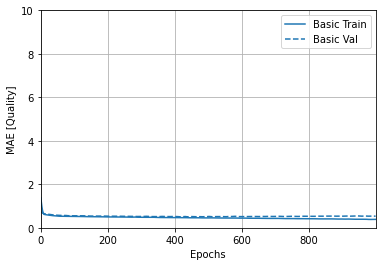

In [138]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Quality]')

In [139]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=1000, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.2593,  mae:0.3966,  mse:0.2593,  val_loss:0.5027,  val_mae:0.5387,  val_mse:0.5027,  
..................................

In [140]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Quality]')

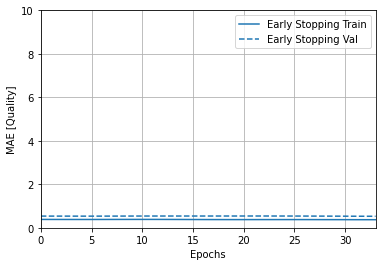

In [141]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Quality]')

In [142]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

10/10 - 0s - loss: 0.4389 - mae: 0.4950 - mse: 0.4389
Testing set Mean Abs Error:  0.50 


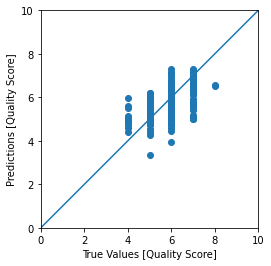

In [144]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Quality Score]')
plt.ylabel('Predictions [Quality Score]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [145]:
test_predictions.min()

3.3372767

In [146]:
test_predictions.mean()

5.5472083

In [147]:
test_predictions.max()

7.314413

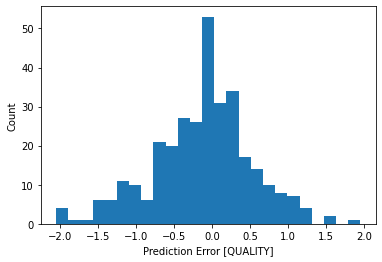

In [148]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [QUALITY]")
_ = plt.ylabel("Count")

In [129]:
new_pred = model.predict(normalize(np.array([[7.4 , 1.185,0 , 4.25 , 0.0969999999999999 , 5 , 14 , 0.7966 , 2.63 , 0.64 , 10.7]])))

In [130]:
new_pred.flatten()[0]

5.39861